<a href="https://colab.research.google.com/github/polaroidz/simple_regression/blob/main/Regress%C3%A3o_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.api import OLS

### Modelar a relação entre o investimento em propaganda com o retorno financeiro obtido.

In [148]:
dataset = pd.read_excel('./PR.xls', 
                        sheet_name='RGLS1', 
                        header=1, 
                        names=('Propaganda', 'Retorno'))

In [149]:
dataset.head()

,Propaganda,Retorno
0,0,8520.729865
1,0,12574.830000
2,0,6634.647902
3,0,7075.619195
4,0,7247.572298


In [150]:
X = dataset['Propaganda']
y = dataset['Retorno']

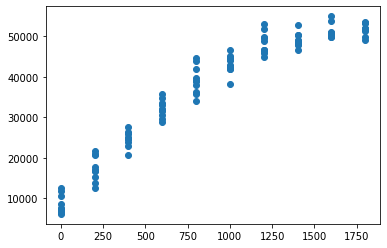

In [151]:
plt.scatter(X, y);

In [153]:
X.corr(y)

0.9479972919736424

### A medida de correlação entre as variáveis indica uma relação linear forte que pode ser estimada por regressão linear.

In [154]:
# Padronizando os dados
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

In [155]:
X = X.to_numpy().reshape(-1, 1)
y = y.to_numpy().reshape(-1, 1)

X.shape

(99, 1)

In [156]:
ols = OLS(y,X).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              869.4
Date:                Fri, 20 Nov 2020   Prob (F-statistic):                    1.60e-50
Time:                        19:18:00   Log-Likelihood:                         -26.634
No. Observations:                  99   AIC:                                      55.27
Df Residuals:                      98   BIC:                                      57.86
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9480      0.032     29.486      0.000       0.884       1.012
==============================================================================
Omnibus:                        2.954   Durbin-Watson:                   0.431
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                1.833
Skew:                          -0.054   Prob(JB):                        0.400
Kurtosis:                       2.342   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

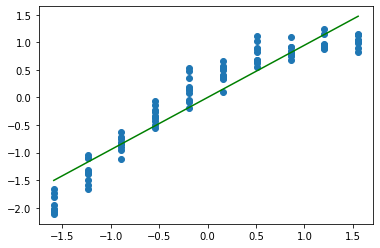

In [158]:
y_pred = ols.predict(X)

plt.scatter(X[:,0], y)
plt.plot(X[:,0], y_pred, color='green');

### Apesar da forte correlação o R^2 não passou de 0.9. O que indica que parte da variancia não está sendo explicada pela linha.

### Verificamos uma mudança no declive dos dados que não está sendo replicado pela linha. Para adicionar essa informação no modelo vamos adicionar features polinomiais que podem beneficiar o modelo.



In [160]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

X.shape

(99, 3)

In [161]:
ols = OLS(y,X).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1803.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           7.29e-77
Time:                        19:19:39   Log-Likelihood:                 40.819
No. Observations:                  99   AIC:                            -75.64
Df Residuals:                      96   BIC:                            -67.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3083      0.025     12.504      0.000       0.259       0.357
x1             0.9455      0.016     57.527      0.000       0.913       0.978
x2            -0.3115      0.019    -16.705      0.000      -0.349      -0.274
==============================================================================
Omnibus:                        2.920   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.530
Skew:                           0.390   Prob(JB):                        0.282
Kurtosis:                       3.078   Cond. No.                         2.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

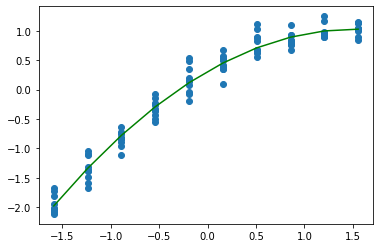

In [162]:
y_pred = ols.predict(X)

plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_pred, color='green');

### Pronto. Obtemos uma linha que replica a mudança de declive observada nos dados.